# Assignement 3, Data science in practice, MGT-415, 26.04.2020
## Aubry Yannick, Fontannaz Benoît, Muret Gabriel Pierre Etienne, Tedeschi Julien Brian, Terrier Cédric

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
data = pd.read_excel('network_data.xlsx')
print(data.shape)
print(data.dtypes)
data.head()

(88234, 2)
NodeA    int64
NodeB    int64
dtype: object


,NodeA,NodeB
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [3]:
NETWORK = nx.Graph()
length_data = len(data)
for i in range(10000):
    NETWORK.add_edge(data.NodeA[i],data.NodeB[i])

/Applications/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


<function matplotlib.pyplot.show(*args, **kw)>

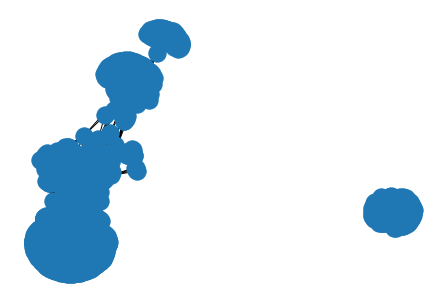

In [4]:
nx.draw(NETWORK)
plt.show

The network with every point is represented below due to long computational time:
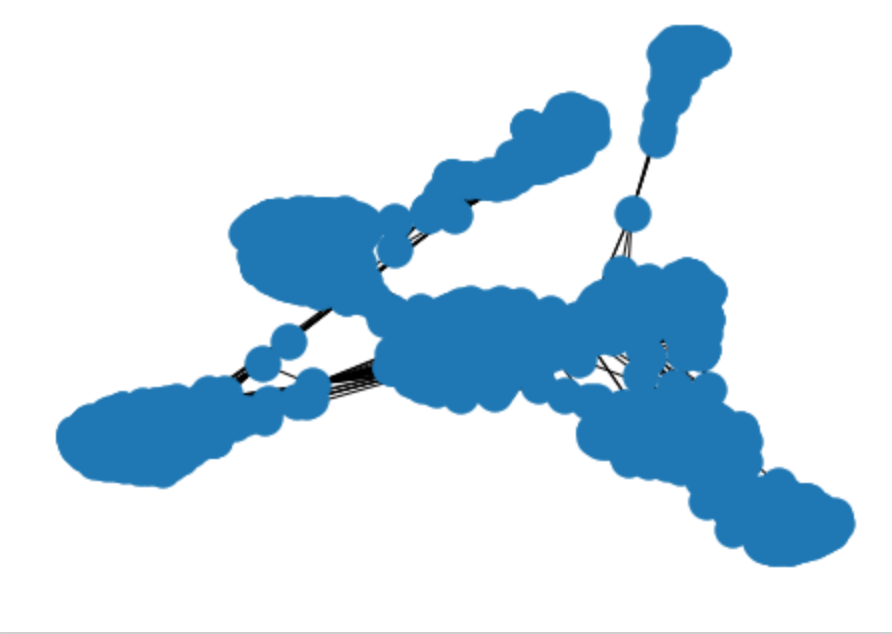

In [5]:
results1 = pd.DataFrame(NETWORK.degree(), columns = ['node','degree'])

In [6]:
degree_centrality = nx.degree_centrality(NETWORK)
results2 = pd.DataFrame(degree_centrality.items(), columns = ['node','degree_centrality'])

In [ ]:
betweenness = nx.betweenness_centrality(NETWORK)
results3 = pd.DataFrame(betweenness.items(), columns = ['node','betweenness'])

In [ ]:
eig_centr = nx.eigenvector_centrality(NETWORK)
results4 = pd.DataFrame(eig_centr.items(), columns = ['node','eigenvector_centrality'])

In [ ]:
results = results1.join(results2.degree_centrality).join(results3.betweenness).join(results4.eigenvector_centrality)

In [ ]:
degree_hist = plt.hist(results.degree, 100, range = [0,300])
plt.xlabel('Number of Neighbors (degree)')
plt.ylabel('Number of nodes')
plt.title('Nodes Degree distribution')

plt.figure()
degree_hist = plt.hist(results.degree_centrality, 100, range = [0,1])
plt.xlabel('Degree centrality')
plt.ylabel('Number of nodes')
plt.title('Degree centrality distribution')

plt.figure()
degree_hist = plt.hist(results.betweenness, 100, range = [0,0.5])
plt.xlabel('Betweenness')
plt.ylabel('Number of nodes')
plt.title('Betweenness distribution')

plt.figure()
degree_hist = plt.hist(results.eigenvector_centrality, 100, range = [0,1])
plt.xlabel('Eigenvector centrality')
plt.ylabel('Number of nodes')
plt.title('Eigenvector centrality distribution')

In [ ]:
density = nx.density(NETWORK)
av_path = nx.average_shortest_path_length(NETWORK)
print('The density of the network is:', density)
print("The average shortest path length of the network is:", av_path)

In [ ]:
within a cluster, how many nodes to reachable in N steps, edge/edge possible